# __USA Regional Sales Analysis__

### __Problem Statement:__

The sales data is of Acme Company for the period 2014–2018 was analyzed to identify key revenue and profit drivers across products, channels, and regions. The analysis further highlighted seasonal trends, performance outliers, and variances against budgeted figures. These insights provide a foundation for optimizing pricing and promotional strategies, guiding market expansion initiatives, and ensuring sustainable growth while mitigating concentration risk.


## __Project Summary__

This EDA notebook analyzes Acme Co.’s U.S. sales data (2014–2018) through:

__Data Profiling & Cleaning__: Validated schema, addressed missing budget values, and standardized data types.

__Univariate & Bivariate Analysis__: Examined key distributions (revenue, margin, unit price) along with product, channel, region, and customer segment performance.

__Trend & Seasonality__: Visualized monthly and annual sales trends, revealing recurring peaks and slowdowns.

__Outlier Detection__: Flagged unusually high and low transactions in both revenue and unit price.

__Correlation & Segmentation__: Evaluated metric relationships and grouped customers based on revenue and profit margin patterns.

### __Objective__

Extract actionable insights from __Acme Co.’s 2014–2018__ sales data to:

Pinpoint top-performing products, sales channels, and regions driving revenue and profitability

Detect seasonal patterns and irregularities to enhance planning and forecasting

Identify pricing and margin risks arising from outlier transactions

Support data-driven pricing, promotional, and market-expansion strategies

These insights will ultimately inform the development of a Power BI dashboard to enable strategic decision-making and foster sustainable growth.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheets = pd.read_excel('content/Regional Sales Dataset.xlsx', sheet_name = None)

In [3]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [4]:
# Assign different dataframes to different sheets

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_state_regions = sheets['State Regions']
df_products = sheets['Products']
df_budgets = sheets['2017 Budgets']


In [5]:
df_sales.head(10)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270
5,SO - 0010394,2014-01-01,138,Export,USD,NXH382,626,23,11,5219.3,57412.3,4332.019
6,SO - 0008865,2014-01-01,53,Wholesale,USD,GUT930,540,1,7,2874.3,20120.1,1667.094
7,SO - 0009909,2014-01-01,45,Wholesale,USD,AXW291,156,25,10,1045.2,10452.0,679.380
8,SO - 0001912,2014-01-01,85,Wholesale,USD,AXW291,934,13,5,3852.5,19262.5,2966.425
9,SO - 0002683,2014-01-01,125,Export,USD,AXW291,652,14,12,2914.5,34974.0,1311.525


In [6]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [7]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [8]:
df_state_regions.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [9]:
new_header = df_state_regions.iloc[0]
df_state_regions.columns = new_header
df_state_regions = df_state_regions[1:].reset_index(drop=True)

df_state_regions.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [10]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [11]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [12]:
print("df_sales shape:", (df_sales.shape))
print("df_customers shape:", (df_customers.shape))
print("df_regions shape:", (df_regions.shape))
print("df_state_regions shape:", (df_state_regions.shape))
print("df_products shape:", (df_products.shape))
print("df_budgets shape:", (df_budgets.shape))

df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_regions shape: (994, 15)
df_state_regions shape: (48, 3)
df_products shape: (30, 2)
df_budgets shape: (30, 2)


In [13]:
# Null value checks

df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [14]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [15]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [16]:
df_state_regions.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [17]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [18]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

### Data Cleaning and Wrangling

In [19]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


In [20]:
# Merging sales and customer table

df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [21]:
df.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd


In [22]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


In [23]:
df_products.head(1)

,Index,Product Name
0,1,Product 1


In [24]:
df.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd


In [25]:
# Merge with regions

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [26]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'id', 'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone'],
      dtype='object')

In [27]:
# Merge with State regions

df = df.merge(
    df_state_regions[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [28]:
df.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South


In [29]:
# Merge with Products

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)


In [36]:
df_budgets.head(1)

,Product Name,2017 Budgets
0,Product 1,3016489.209


In [37]:
df_budgets.columns = df_budgets.columns.str.lower()

df_budgets.columns.values

array(['product name', '2017 budgets'], dtype=object)

In [38]:
# Merge with Budgets

df = df.merge(
    df_budgets,
    how='left',
    on='product name'
)

In [39]:
df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code',
       'population', 'households', 'median_income', 'land_area', 'water_area',
       'time_zone', 'region', 'product name', '2017 budgets'],
      dtype='object')

In [31]:
df.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,population,households,median_income,land_area,water_area,time_zone,State Code,Region,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,South,27,Product 27


In [32]:
# Customer Index
# Index
# id
# State Code

#clean up redundant columns
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns = cols_to_drop, errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,Product 8


In [33]:
# convert all columns to lower case for consistency and easier access
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'name',
       'county', 'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', 'product name'],
      dtype=object)

In [40]:
# Keep the important columns and rest which are not needed we delete it

cols_to_keep =[
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [41]:
df = df[cols_to_keep]

In [42]:
df.head(1)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [43]:
df = df.rename(columns={"line total": "revenue"})

In [44]:
df = df.rename(columns={
    '2017 budgets': 'budgets',
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_names',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'total unit cost': 'total_unit_cost',
})

In [45]:
# Blank out budgets for non-2017 orders

df.loc[df['order_date'].dt.year != 2017,'budgets']= pd.NA

df[['order_date','product_name','revenue','budgets']].head(5)

,order_date,product_name,revenue,budgets
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [46]:
df[['order_date','product_name','revenue','budgets']].tail(5)

,order_date,product_name,revenue,budgets
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [47]:
df.to_csv('clean-data.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_names   64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total_unit_cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state            64104 non-null  object        
 12  region           64104 non-null  object        
 13  latitude         64104 non-null  float64       
 14  longitude        64104 non-null  float

### Filtering the dataset to include only records from year 2017

In [49]:
df_2017 = df[df['order_date'].dt.year == 2017]

In [50]:
df.isnull().sum()

order_number           0
order_date             0
customer_names         0
channel                0
product_name           0
order_quantity         0
unit_price             0
revenue                0
total_unit_cost        0
state_code             0
county                 0
state                  0
region                 0
latitude               0
longitude              0
budgets            48841
dtype: int64

In [51]:
df_2017.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budgets
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


In [52]:
df_2017.to_csv('2017_data.csv')

### __Feature Engineering__

In [53]:
df['total_cost'] = df['order_quantity'] * df['total_unit_cost']

In [54]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = df['profit'] / df['revenue']*100

In [55]:
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budgets,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


## __Exploratory Data Analysis__

### Monthly series over time, Trend analysis

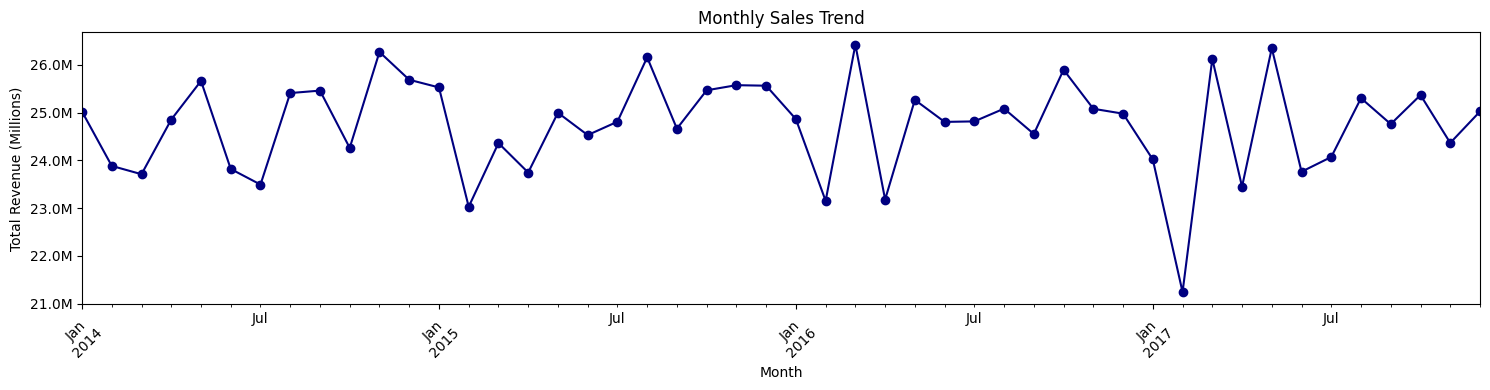

In [125]:

df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker='o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

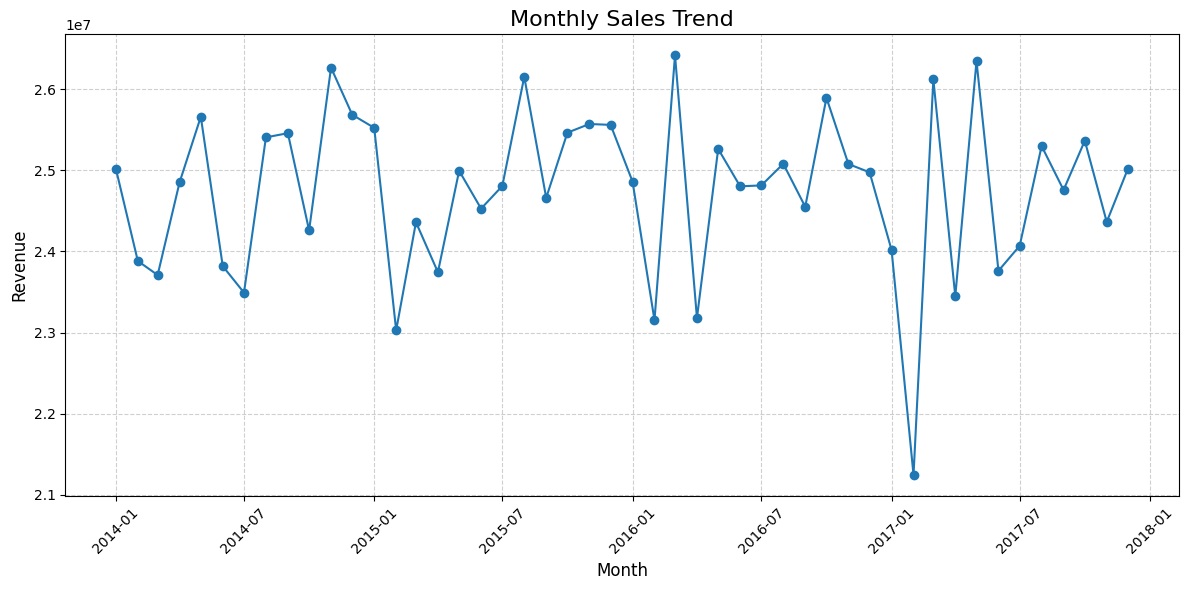

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year-month for grouping
df['year_month'] = df['order_date'].dt.to_period('M')

# Aggregate revenue (you can also use 'order_quantity' if you want total units)
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert back to datetime for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['year_month'], monthly_sales['revenue'], marker='o')

plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [113]:
# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Define the months to remove
mask = ~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))

# Apply filter
df = df[mask].reset_index(drop=True)


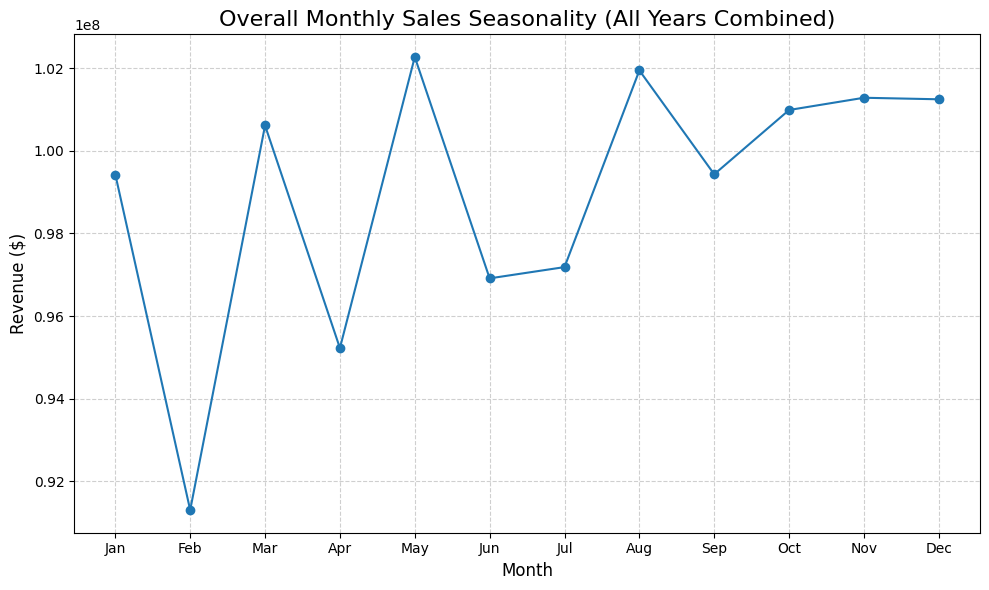

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month name and month number for sorting
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.strftime('%b')

# Aggregate revenue by calendar month (across all years)
monthly_seasonality = df.groupby(['month','month_name'])['revenue'].sum().reset_index()

# Sort by month number to keep Jan–Dec order
monthly_seasonality = monthly_seasonality.sort_values('month')

# Plot seasonality trend
plt.figure(figsize=(10,6))
plt.plot(monthly_seasonality['month_name'], monthly_seasonality['revenue'], marker='o')

plt.title("Overall Monthly Sales Seasonality (All Years Combined)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## __Insight on sales seasonality__

The overall monthly sales seasonality reveals a clear cyclical pattern, with noticeable dips in February and April followed by strong peaks in May and August, and a consistent recovery toward the year-end (October to December). This indicates that sales are not evenly distributed throughout the year but are instead influenced by seasonal demand cycles, possibly tied to festive periods, mid-year buying trends, or business procurement cycles.

### Top 10 products by Revenue

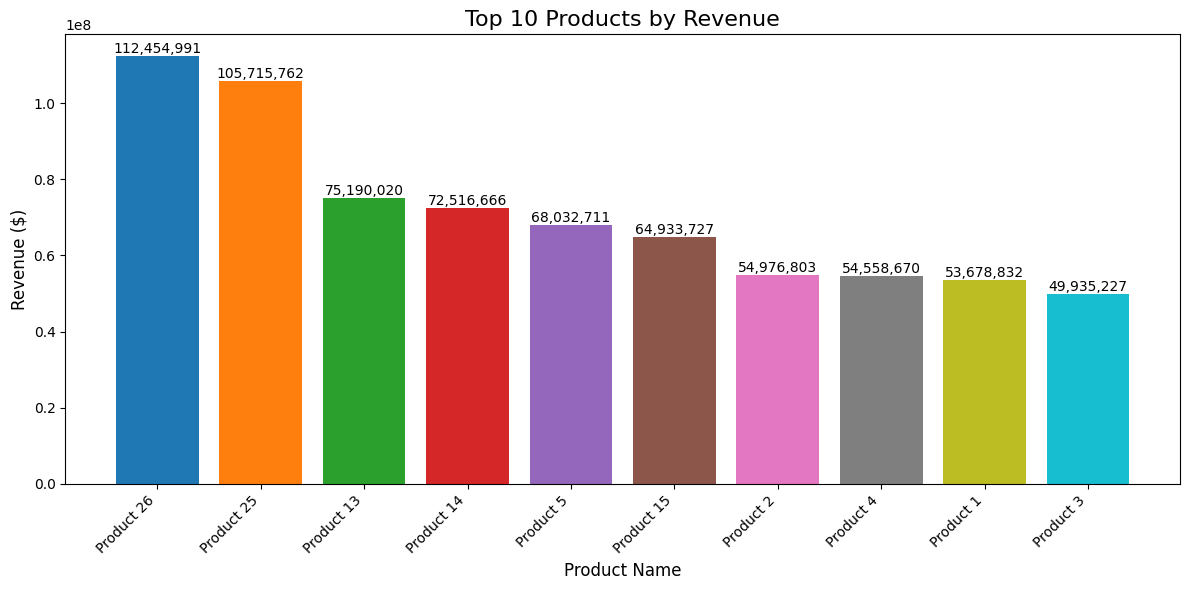

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate revenue by product
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Sort and take top 10
top_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(top_products['product_name'], top_products['revenue'], color=plt.cm.tab10.colors)

plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### __Insights on Top 10 Products by revenue__

* __Top Performers__:

Product 26 with 112M USD revenue (highest) and Product 25 with 106M USD revenue.

These two products alone contribute a substantial share of overall revenue, making them core growth drivers.

* __Second Tier__:

Product 13 (75M) USD and Product 14 (72M) USD show strong but significantly lower sales compared to the top two.

Their performance highlights an opportunity to scale them further.

* __Mid-Range Products__:

Products 5 (68M) USD, 15 (65M) USD, and 2 (55M) USD generate consistent mid-level revenue.

These are important for diversification and stability.

* __Lower End of Top 10__:

Product 4, Product 1, and Product 3 each generate around $50M USD revenue.

Though smaller, they still contribute meaningfully and may represent niche or emerging products.

### Bottom 10 products by Revenue

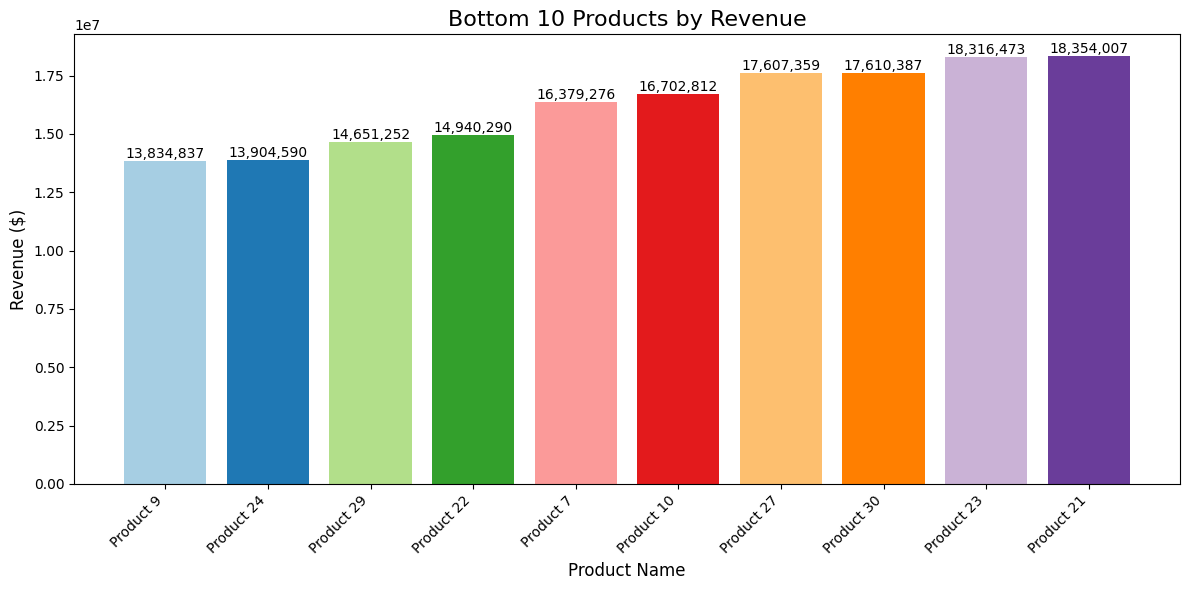

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate revenue by product
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Sort and take bottom 10
bottom_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(bottom_products['product_name'], bottom_products['revenue'], color=plt.cm.Paired.colors)

plt.title("Bottom 10 Products by Revenue", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### __Insights on Bottom 10 Products by Revenue__

* __Lowest Revenue Products__:

Product 9 13.8M USD and Product 24 13.9M USD are at the bottom, with the weakest revenue contribution across all products.

These may require review for discontinuation or repositioning.

* __Lower Tier Group__:

Products 29 14.6M USD and 22 14.9M USD show only slightly better performance but still remain at the lower end of the portfolio.

* __Mid-Low Performers__:

Products 7 16.4M USD and 10 16.7M USD are marginally higher but remain well below the top product benchmarks.

* __Upper End of Bottom 10__:

Products 27 17.6M USD, 30 17.6M USD, 23 18.3M USD, and 21 18.4M USD are relatively stronger within this bottom tier.

They may hold potential if supported with targeted marketing or sales campaigns.

#### __Key Takeaway__:

The revenue gap between the top products ($100M+) and bottom products ($14M–18M) is substantial, highlighting a highly concentrated revenue distribution.

Strategic decisions (phase-out, improvement, or focused promotion) are needed to manage low performers effectively.

### Sales by Channel

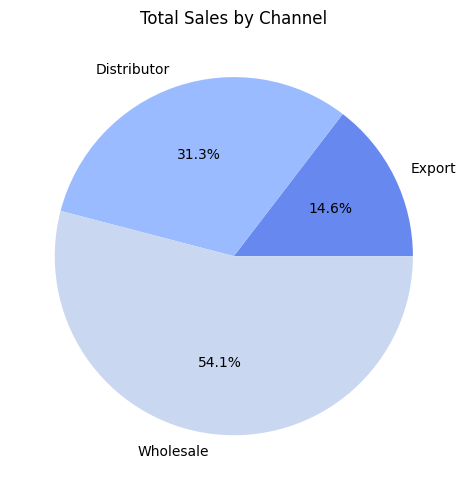

In [117]:
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5, 5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')

plt.tight_layout()

plt.show()

### __Insights on Total Sales by Channel__

1. Wholesale dominates sales: Wholesale contributes 54.1% of total sales, making it the primary revenue driver.Indicates strong reliance on bulk buyers, likely ensuring volume stability.

2. Distributor channel is the second-largest: Distributors account for 31.3% of sales. Suggests that regional or partner-based distribution networks are also crucial for business reach.

3. Export has the smallest share: Exports make up only 14.6% of sales. This highlights limited global penetration, and potentially a missed opportunity for growth in international markets.

#### __Strategic Implications__

The business is highly dependent on wholesale; diversifying across channels could reduce risk. Expanding exports could unlock new markets and reduce overreliance on domestic wholesale buyers. Distributor performance improvements (e.g., incentives, training, or regional campaigns) could further boost their contribution.

### Average order value (AOV) distribution.

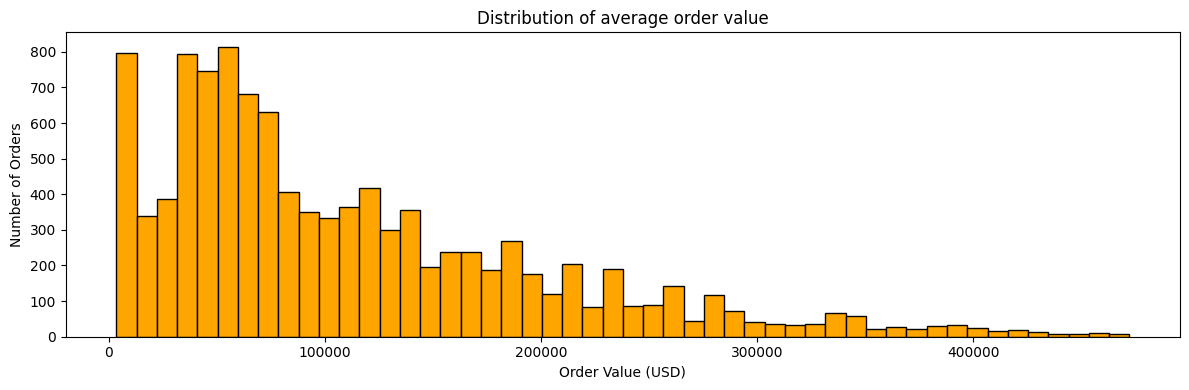

In [124]:

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12, 4))

plt.hist(
    aov,
    bins=50,
    color='orange',
    edgecolor='black'
)

plt.title('Distribution of average order value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()

### __Insights on Distribution of Average Order Value__

1. The data is right-skewed, meaning most orders are concentrated at lower values, while a few very large orders push the tail to the right.

2.  A significant bulk of transactions lie between USD 0–100K, peaking in the USD 20K–60K range. This suggests that most customers place small-to-medium size orders.

3. Orders above USD 200K are much less frequent, but still present.These large transactions, though few, may disproportionately impact total revenue.

4. The company’s revenue mix is volume-driven (many smaller orders) with occasional big-ticket deals. Customer segmentation could distinguish between high-frequency small buyers and low-frequency large buyers.

### Unit price distribution per product

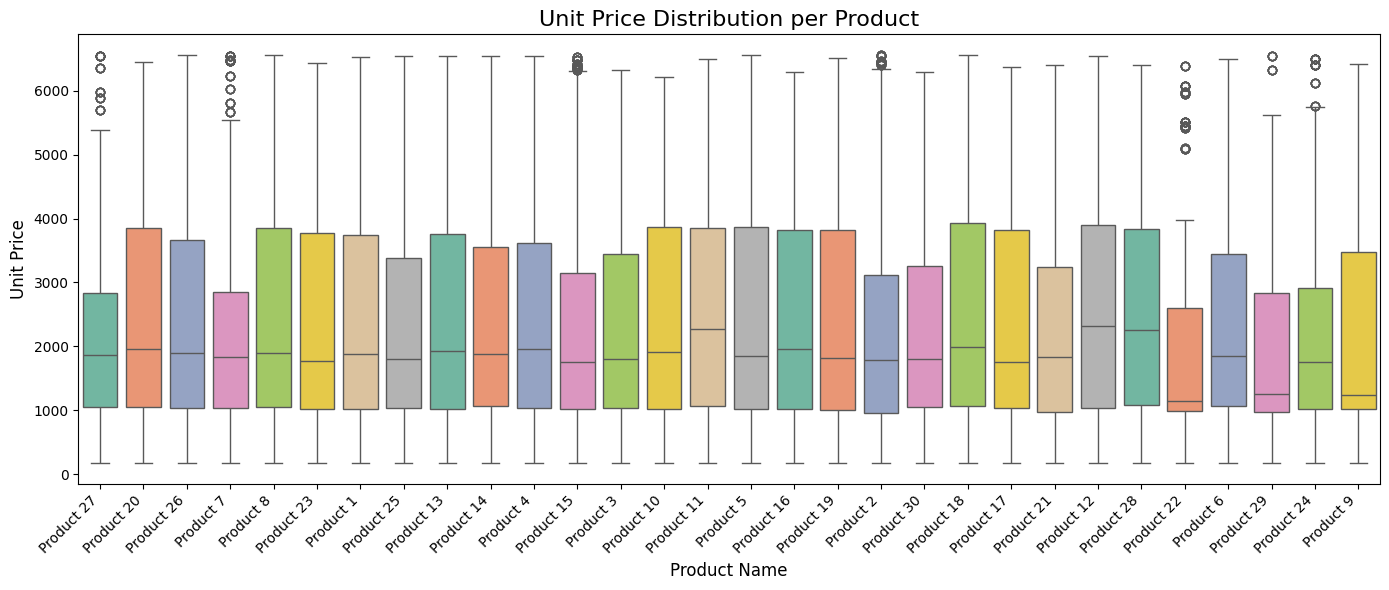

In [81]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Set hue=product_name so each product gets a color
sns.boxplot(
    data=df,
    x="product_name",
    y="unit_price",
    hue="product_name",   # ensures colors are assigned properly
    dodge=False,          # keeps 1 box per product
    palette="Set2",
    legend=False          # hides duplicate legend
)

plt.title("Unit Price Distribution per Product", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Unit Price", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Unit price distribution per product (Top 10)

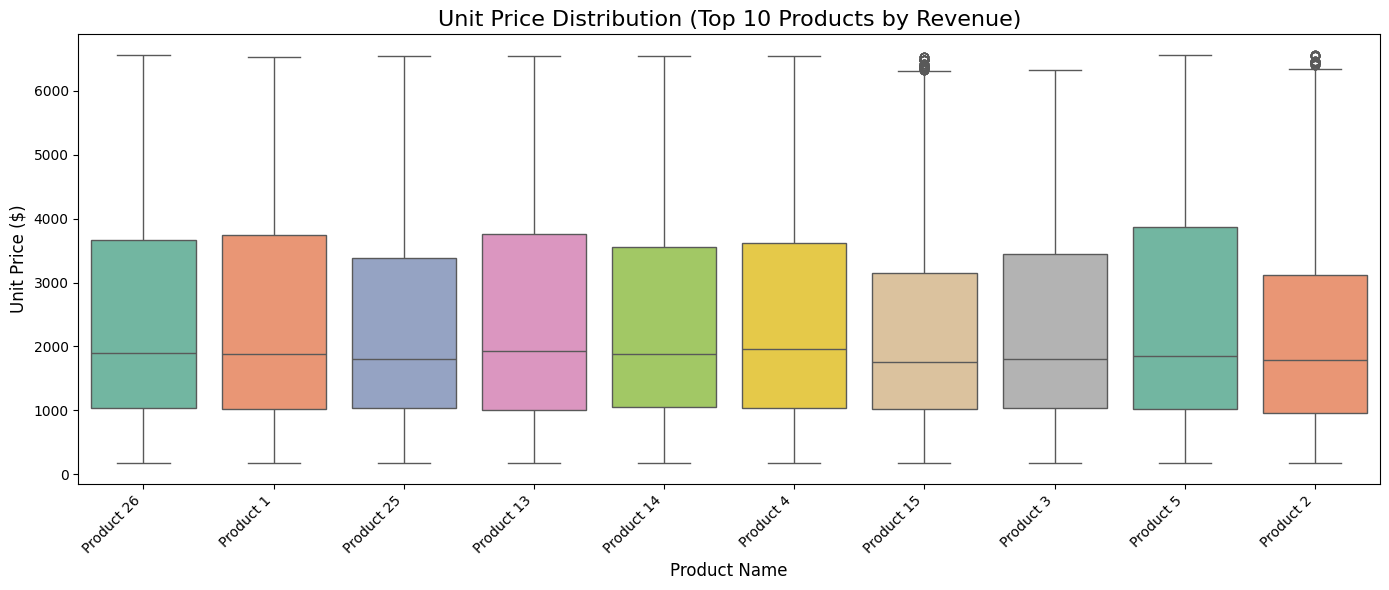

In [82]:

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get Top 10 Products by Revenue
top_products = (
    df.groupby("product_name")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 2: Filter dataframe to only those products
df_top = df[df["product_name"].isin(top_products)]

# Step 3: Plot boxplot
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_top,
    x="product_name",
    y="unit_price",
    hue="product_name",   # ensures different colors
    dodge=False,
    palette="Set2",
    legend=False
)

plt.title("Unit Price Distribution (Top 10 Products by Revenue)", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Unit Price ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### __Insights on Unit Price Distribution__

* All products show large ranges in unit prices, with whiskers stretching up to $6000+, indicating pricing variability. Some products (e.g., Product 25, Product 13, Product 14) show more tightly packed boxes, meaning relatively stable pricing.

* Products like Product 13 and Product 21 display clear outliers at higher price points, suggesting occasional premium sales or unusual transactions. These outliers may need investigation for discounting errors or niche high-value deals.

* Most products have median unit prices below $2000, showing that the bulk of sales occur at moderate pricing levels. Revenue dominance is likely due to high sales volume rather than consistently high unit prices.

#### __Future implications__

Stable pricing products (like Product 25, Product 14) are predictable and good for volume-driven strategies. Volatile products (with wide spreads and outliers) may require closer monitoring to avoid pricing/margin risks.
Outlier-driven products could signal specialized market opportunities (premium segment) or potential data anomalies.

### Bivariate Analysis: Unit Price vs. Profit Margin %

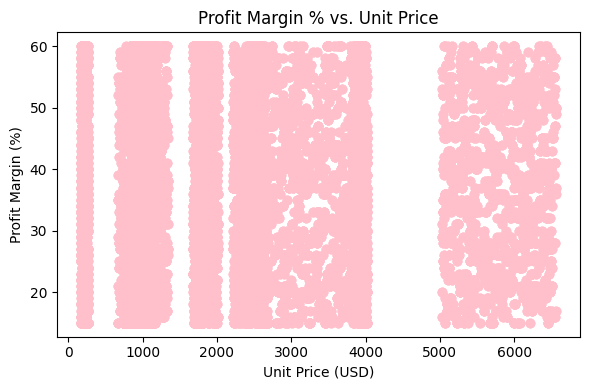

In [129]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='pink'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

### __Insight on Bivariate Analysis: Unit Price vs. Profit Margin %__

The scatter plot shows that profit margins remain relatively stable (20–50%) across most price bands, with no strong correlation between unit price and margin. Transactions cluster around fixed price tiers (e.g., $500, $1000, $2000), indicating standardized product pricing. Lower-priced products dominate in volume, while higher-priced items show greater margin variability, reflecting inconsistent cost structures or discounting practices.

### Top 10 states by revenue and order count

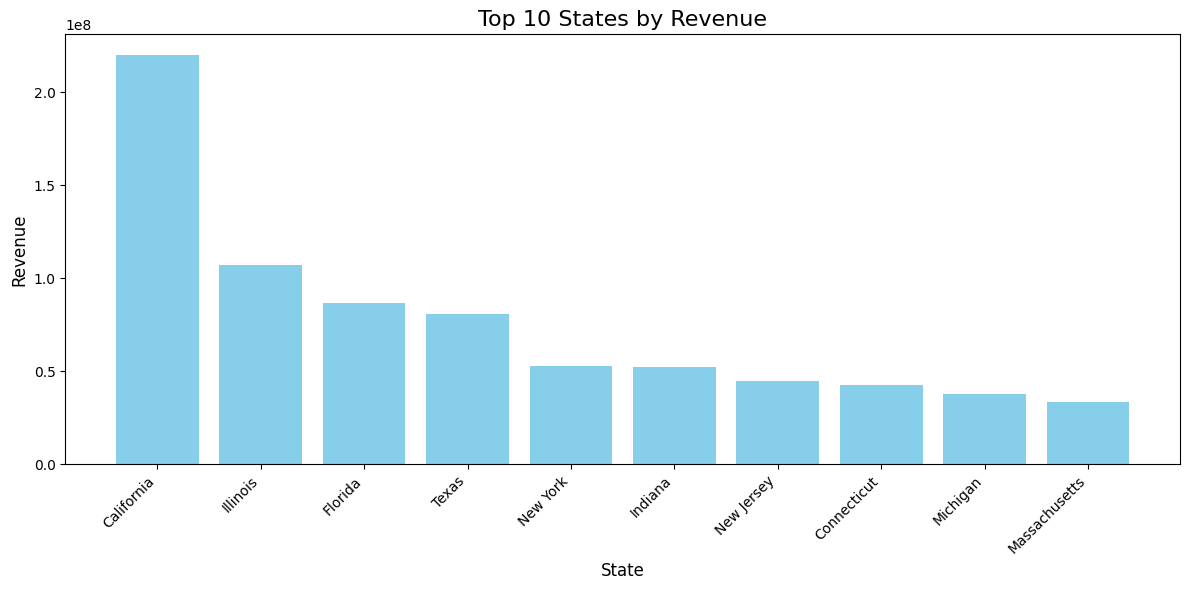

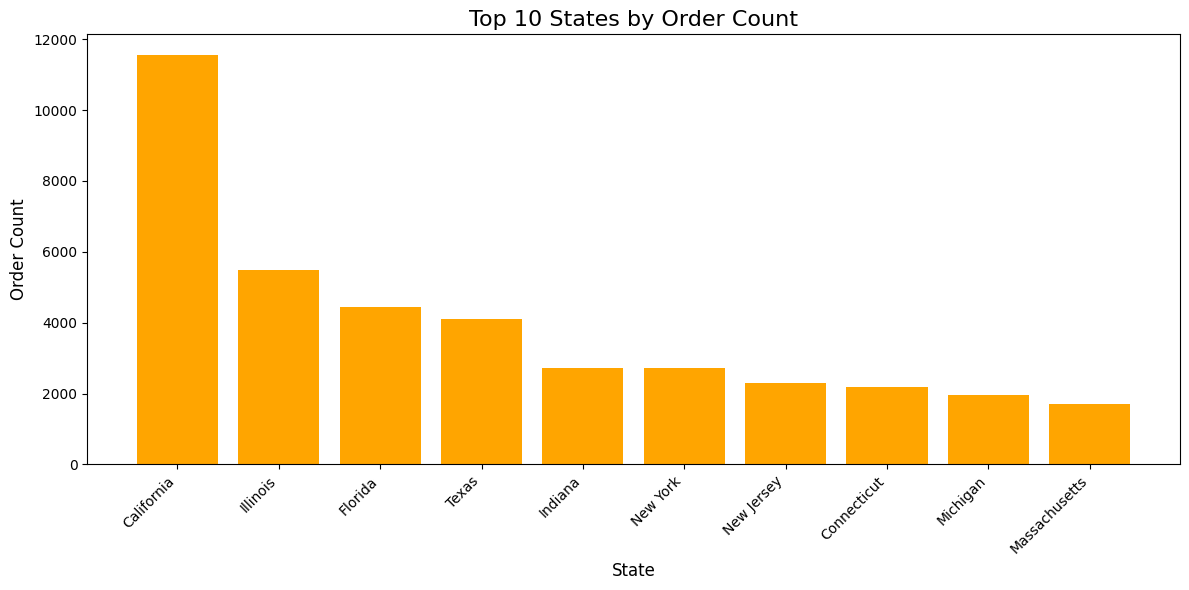

In [83]:

import pandas as pd
import matplotlib.pyplot as plt

# Aggregate revenue and order count by state
state_sales = df.groupby('state').agg({
    'revenue': 'sum',
    'order_number': 'count'   # assuming each row = one order
}).reset_index()

# ---- Top 10 by Revenue ----
top_states_revenue = state_sales.sort_values('revenue', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_states_revenue['state'], top_states_revenue['revenue'], color='skyblue')
plt.title("Top 10 States by Revenue", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---- Top 10 by Order Count ----
top_states_orders = state_sales.sort_values('order_number', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_states_orders['state'], top_states_orders['order_number'], color='orange')
plt.title("Top 10 States by Order Count", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Summary

Sales performance is highly concentrated, with California dominating both revenue and order volume, while other states contribute more modestly. This highlights a heavy regional dependency and potential opportunities for growth diversification.

## __Key Insights__

California is the clear leader:

__Revenue__: Exceeds $200M, far higher than any other state.

__Orders__: Over 11,000 orders, making it the top contributor in both sales and volume.

__Illinois, Florida, and Texas form the second tier__:

Strong revenue (~$80M–$100M range) but with far fewer orders compared to California.

Indicates higher average order values or big-ticket transactions.

New York, Georgia, and New Jersey show moderate performance, contributing consistently but not as high as top-tier states.

Connecticut, Michigan, and Massachusetts round out the top 10 with smaller revenue and order counts, suggesting regional market limitations.

The gap between California and the rest is significant, pointing to a potential over-reliance on one market.

### Average profit margin by channel

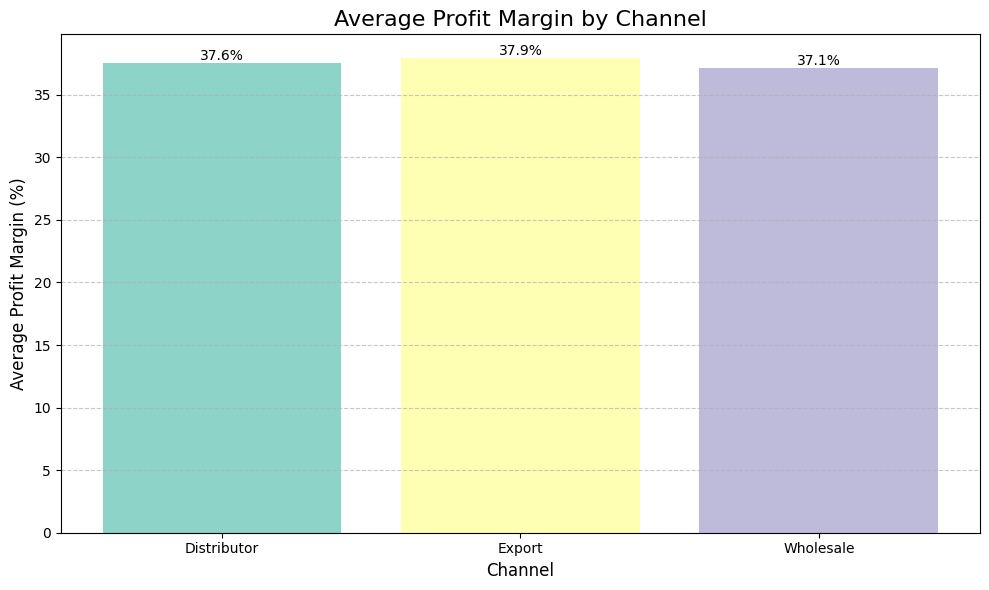

In [84]:

import matplotlib.pyplot as plt

# Calculate average profit margin by channel
channel_margin = df.groupby('channel')['profit_margin_pct'].mean().reset_index()

# Plot bar chart with multi-colors
plt.figure(figsize=(10,6))
bars = plt.bar(channel_margin['channel'], channel_margin['profit_margin_pct'], 
               color=plt.cm.Set3.colors)  # multi-color palette

# Add grid lines in background
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add titles and labels
plt.title("Average Profit Margin by Channel", fontsize=16)
plt.xlabel("Channel", fontsize=12)
plt.ylabel("Average Profit Margin (%)", fontsize=12)

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f"{bar.get_height():.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Executive Summary

Profit margins across Distributor, Export, and Wholesale channels are relatively consistent, with only marginal differences. This indicates balanced pricing and cost structures across channels, but also limited differentiation in profitability.

## __Key Insights__

Export channel leads slightly with the highest average margin (37.9%), suggesting favorable pricing or lower costs in international markets.

Distributor channel follows closely at 37.6%, indicating strong profitability in intermediary-driven sales.

Wholesale channel lags marginally at 37.1%, which could reflect bulk discounts or tighter cost control challenges.

The narrow margin spread (just 0.8% difference) suggests that no single channel significantly outperforms others in profitability.

### Future Implication

Since margins are stable, revenue growth will likely depend more on sales volume expansion than margin improvements.

A small uplift in wholesale efficiency (e.g., optimizing bulk deals or reducing costs) could bring parity with the best-performing channel.

Export may offer scalable growth potential, as it already shows the highest margin performance.

### Top and Bottom 10 customers by Revenue

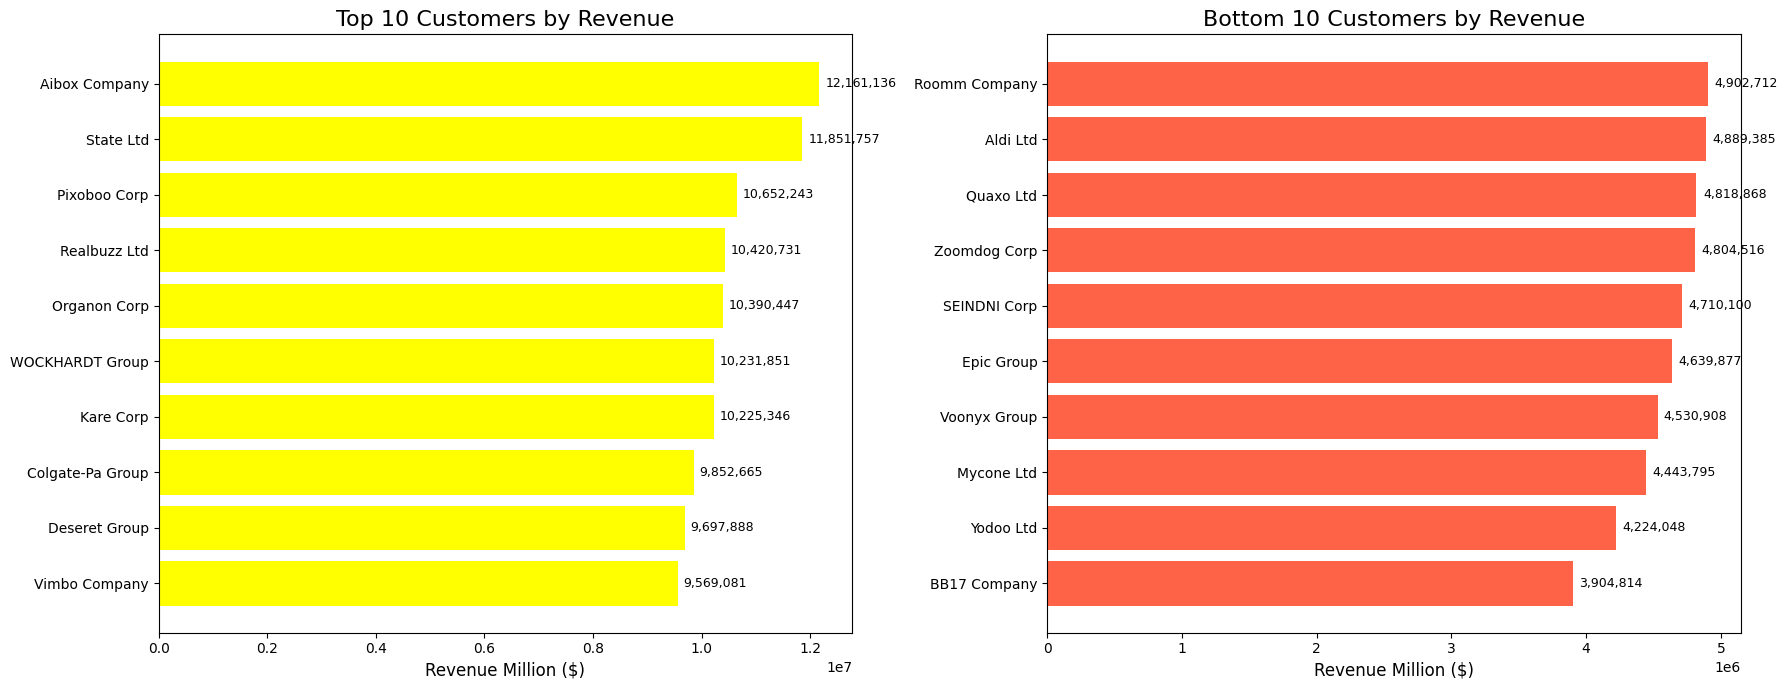

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate revenue by customer
customer_sales = df.groupby('customer_names')['revenue'].sum().reset_index()

# Top 10 and Bottom 10
top_customers = customer_sales.sort_values('revenue', ascending=False).head(10)
bottom_customers = customer_sales.sort_values('revenue', ascending=True).head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ---- Top 10 Customers ----
bars1 = axes[0].barh(top_customers['customer_names'], top_customers['revenue'], color='yellow')
axes[0].set_title("Top 10 Customers by Revenue", fontsize=16)
axes[0].set_xlabel("Revenue Million ($)", fontsize=12)
axes[0].invert_yaxis()  # Highest revenue at top

# Add values on bars
for bar in bars1:
    xval = bar.get_width()
    axes[0].text(xval + (0.01 * xval), bar.get_y() + bar.get_height()/2,
                 f"{xval:,.0f}", va='center', fontsize=9)

# ---- Bottom 10 Customers ----
bars2 = axes[1].barh(bottom_customers['customer_names'], bottom_customers['revenue'], color='tomato')
axes[1].set_title("Bottom 10 Customers by Revenue", fontsize=16)
axes[1].set_xlabel("Revenue Million ($)", fontsize=12)

# Add values on bars
for bar in bars2:
    xval = bar.get_width()
    axes[1].text(xval + (0.01 * xval), bar.get_y() + bar.get_height()/2,
                 f"{xval:,.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


### Summary

The revenue distribution across customers is highly skewed, with a small set of top customers contributing disproportionately higher sales compared to the bottom tier. This concentration highlights both strong key accounts and dependency risks.

## __Key Insights__

__Top 10 Customers__

Customers like Alibox Company and State Ltd generate the highest revenues, exceeding $11M–12M each, making them critical revenue drivers.

Several other top clients (e.g., Pixobox Corp, Realbuzz Ltd, Organon Corp) contribute between $10M–11M, showing a strong cluster of mid-to-high-value accounts.

__Bottom 10 Customers__

Revenues here drop sharply, with companies like Roomm Company, Aldi Ltd, Quaxo Ltd generating under $5M each.

The smallest accounts (e.g., Yodoo Ltd, BB17 Company) contribute less than $4.5M, indicating limited strategic value.

__Revenue Gap__

The top customer (Alibox Co.) earns nearly 3× the revenue of the lowest-tier customers, showing significant concentration at the top.

This suggests opportunities to deepen engagement with top-tier accounts while exploring growth strategies for mid/low-tier customers.

__Strategic Implication__

Heavy reliance on a few major customers introduces concentration risk—losing even one could impact total revenue significantly.

On the other hand, the bottom-tier customers present potential upsell or expansion opportunities if targeted effectively.

### Customer segmentation vs Profit margin

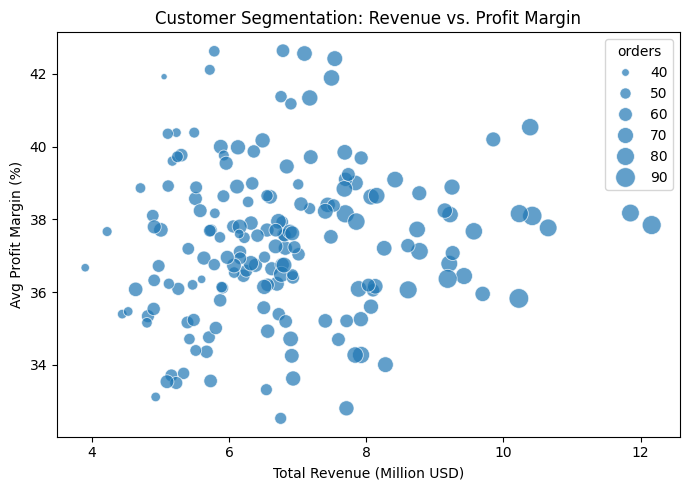

In [107]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_names').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

## __Insights from (Revenue vs Profit Margin by Customer Segment)__


__Revenue Concentration__:
Most customers cluster between $5M–$8M in revenue, with average profit margins around 36%–39%.

__High Revenue, Stable Margins__:
A few customers generate >$10M in revenue, but their profit margins don’t significantly exceed the cluster—indicating that scale doesn’t guarantee higher margins.

__Profit Margin Ceiling__:
Profit margins largely stay in the 34%–42% range, suggesting operational efficiency improvements may be capped beyond a certain point.

__Order Size Effect__:
Bubble sizes (representing orders) show that customers with more orders don’t always yield the highest revenue—some high-revenue accounts come from fewer, larger orders.

__Strategic Implication__:
Revenue growth opportunities likely lie in deepening relationships with mid-revenue customers (~$6–8M) who show healthy margins, while cost management strategies are needed for high-revenue accounts that don’t deliver better profitability.

### Correlation Heatmap

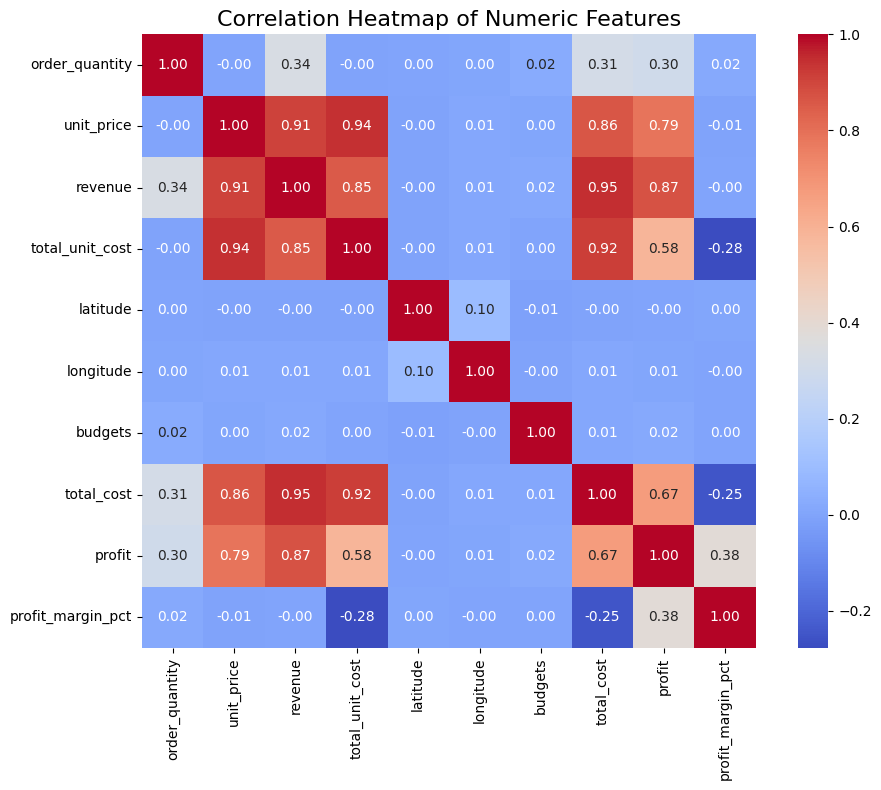

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


## __Correlation Heatmap Insights__

The correlation analysis highlights clear relationships between key business drivers of revenue, cost, and profitability. While revenue is strongly linked to pricing and costs, profit margins show weaker associations, indicating that high revenue does not always translate to high profitability.

### Key Insights:

__Revenue Drivers__: Strongly correlated with unit price (0.91) and total cost (0.95), suggesting pricing strategy and cost efficiency are critical for growth.

__Profit Dynamics__: Profit is closely tied to revenue (0.87), but profit margin percentage has little correlation with revenue (–0.01), highlighting risks of high-volume, low-margin sales.

__Cost Sensitivity__: Higher unit costs reduce profit margins (–0.28), reinforcing the need for cost management to protect profitability.

__Non-Drivers__: Geographic variables (latitude, longitude) and budgets show negligible correlation with performance metrics, indicating limited explanatory power.

### Saving the Pre-processed Data

In [119]:
df.columns

Index(['order_number', 'order_date', 'customer_names', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total_unit_cost', 'state_code', 'county', 'state', 'region',
       'latitude', 'longitude', 'budgets', 'total_cost', 'profit',
       'profit_margin_pct', 'order_month', 'year_month', 'month',
       'month_name'],
      dtype='object')

In [121]:
df.head(15)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,...,latitude,longitude,budgets,total_cost,profit,profit_margin_pct,order_month,year_month,month,month_name
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,2014-01,1,Jan
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,2014-01,1,Jan
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,2014-01,1,Jan
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,2014-01,1,Jan
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,2014-01,1,Jan
5,SO - 0010394,2014-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,...,44.91330,-93.50329,NaN,47652.209,9760.091,17.0,2014-01,2014-01,1,Jan
6,SO - 0008865,2014-01-01,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,...,42.32385,-71.14200,NaN,11669.658,8450.442,42.0,2014-01,2014-01,1,Jan
7,SO - 0009909,2014-01-01,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,...,34.05529,-117.75228,NaN,6793.800,3658.200,35.0,2014-01,2014-01,1,Jan
8,SO - 0001912,2014-01-01,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,...,40.56217,-111.92966,NaN,14832.125,4430.375,23.0,2014-01,2014-01,1,Jan
9,SO - 0002683,2014-01-01,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,...,36.07613,-79.46830,NaN,15738.300,19235.700,55.0,2014-01,2014-01,1,Jan


## __Key Insights of the Regional Sales Analysis__

* __Monthly Revenue Cycle__:
Revenue remained steady between $23M–$26.5M during 2014–2017, with no recurring seasonal spikes. The sharpest dip (~$21.2M) occurred in early 2017, likely due to a one-time disruption.

* __Channel Mix__:
Sales are dominated by Wholesale (54%), followed by Distributors (31%) and Exports (15%), highlighting potential to expand international sales.

* __Top Products (Revenue)__:

Product 26: $118M

Product 25: $110M

Product 13: $78M

* __Mid-tier products__: $68M–$75M

* __Bottom performers__: $52M–$57M

* __Profit Margins__:
Margins range widely from ~18% to ~60%, with no strong link to unit price. Dense clusters across price bands suggest standardized pricing strategies.

* __Seasonal Volume__:
No consistent monthly trend, though a slight uptick appears in May–June. The revenue dip in early 2017 (~$21.2M) warrants further review.

* __Regional Performance__:

California leads with ~$230M revenue and 7,500+ orders. Illinois, Florida, and Texas follow ($85M–$110M; 3,500–4,500 orders). 
NY and Indiana trail at ~$54M with ~2,000+ orders.